# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [75]:
# tag: <div> </div>
# class: "product-info"

### What is the tag name and class name for the old price? The new price?

In [76]:
# tag: <span> </span>
# class old price: 'old price' 
# class new price: 'price'

### What is the tag name and class name for the link to the product page?

In [77]:
# tag: <a href> </a href>
# class: 'product -url'

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [78]:
#we don't need BeautifulSoup because we're communicating with H&M's API
import requests

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [79]:
#On-sale ladies dresses
url='http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Fdresses&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'
response = requests.get(url)

In [80]:
data = response.json()

In [81]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [82]:
len(data['displayArticles'])

60

## URLs

### What is the URL for data about on-sale men's clothing?

In [83]:
#url_men = http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What is the URL for data about on-sale women's clothing?

In [84]:
#url_women = http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What is the URL for data about on-sale women's tops?

In [85]:
#url_tops = http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What changes about the url based on what you're looking for?

In [86]:
#categories

## Request on-sale women's tops.

### How many results do you get?

In [87]:
url= "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"
response = requests.get(url)

In [88]:
data=response.json()

In [89]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [90]:
len(data['displayArticles'])

60

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [91]:
#There are 359 items
#Can we change the "pageSize" setting in the url as the easy way

url= "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=300&page=1&deviceType=DESKTOP"
response = requests.get(url)
data=response.json()
len(data['displayArticles'])

300

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [92]:
url= "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=300&page=1&deviceType=DESKTOP"
response = requests.get(url)
data=response.json()

data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [93]:
data['displayArticles']

[{'activityArticleNumber': '724476',
  'additionalImages': [],
  'articleCode': '65274-B',
  'assortmentState': 'CURRENT',
  'availableSizeInfo': [{'sizeName': 'XS', 'stockSize': '003'},
   {'sizeName': 'S', 'stockSize': '004'},
   {'sizeName': 'M', 'stockSize': '005'},
   {'sizeName': 'L', 'stockSize': '006'},
   {'sizeName': 'XL', 'stockSize': '007'}],
  'availableSwatches': [{'articleCode': '65274-B',
    'castorArticleId': '0478110001',
    'colour': 'ffffff',
    'fabricImageResource': '/fabric/2017/AA6FB049-4F2D-4827-805F-4D7271619395.jpg',
    'fabricUrl': '//lp.hm.com/hmprod?set=source[/fabric/2017/AA6FB049-4F2D-4827-805F-4D7271619395.jpg]&call=url[file:/mobile/v1/fabric/sprite]'}],
  'castorArticleNumber': '001',
  'castorProductNumber': '0478110',
  'colourDescription': 'White',
  'departments': [{'code': 'LADIES',
    'name': 'NAVIGATION.LABEL.DEPARTMENT.LADIES',
    'paths': ['LADIES/LADIES_TOPS/LADIES_TOPS_SHORT_SLEEVED',
     'LADIES/LADIES_BASICS/LADIES_BASICS_TOPS/LADIE

In [94]:
url= 'http://api.hm.com/v2/us/en/products/display?page=1&categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&deviceType=DESKTOP'
response = requests.get(url)
data=response.json()

#We need to create an empty list and fill it
tops = []

tops_d = data['displayArticles']

for item in tops_d:
    current = {}
    current['product-title'] = item['name']
    current['product code'] = item['articleCode']   
    current['old price'] = item['priceInfo']['formattedOldPrice']
    current['price'] = item['priceInfo']['formattedPrice']
    current['product-url'] = item['webUrl']
    tops.append(current)
print(tops)

[{'product-title': 'Short-sleeved Top', 'product code': '65274-B', 'old price': '$9.99', 'price': '$6.99', 'product-url': 'http://www.hm.com/us/product/65274?article=65274-B'}, {'product-title': 'Short-sleeved Top', 'product code': '65274-A', 'old price': '$9.99', 'price': '$6.99', 'product-url': 'http://www.hm.com/us/product/65274?article=65274-A'}, {'product-title': 'Short-sleeved Top', 'product code': '65274-F', 'old price': '$9.99', 'price': '$6.99', 'product-url': 'http://www.hm.com/us/product/65274?article=65274-F'}, {'product-title': 'Short-sleeved Top', 'product code': '65274-E', 'old price': '$9.99', 'price': '$6.99', 'product-url': 'http://www.hm.com/us/product/65274?article=65274-E'}, {'product-title': 'Jersey Top', 'product code': '60133-E', 'old price': '$12.99', 'price': '$5', 'product-url': 'http://www.hm.com/us/product/60133?article=60133-E'}, {'product-title': 'Jersey Top', 'product code': '60133-F', 'old price': '$12.99', 'price': '$5', 'product-url': 'http://www.hm.c

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [95]:
#changing our csv into a data frame for pandas
import pandas as pd 
% matplotlib inline
df = pd.DataFrame(tops) 
df.to_csv('tops.csv', index = False)
df

,old price,price,product code,product-title,product-url
0,$9.99,$6.99,65274-B,Short-sleeved Top,http://www.hm.com/us/product/65274?article=652...
1,$9.99,$6.99,65274-A,Short-sleeved Top,http://www.hm.com/us/product/65274?article=652...
2,$9.99,$6.99,65274-F,Short-sleeved Top,http://www.hm.com/us/product/65274?article=652...
3,$9.99,$6.99,65274-E,Short-sleeved Top,http://www.hm.com/us/product/65274?article=652...
4,$12.99,$5,60133-E,Jersey Top,http://www.hm.com/us/product/60133?article=601...
5,$12.99,$5,60133-F,Jersey Top,http://www.hm.com/us/product/60133?article=601...
6,$12.99,$5.99,68934-C,Jersey Top,http://www.hm.com/us/product/68934?article=689...
7,$12.99,$5,60133-B,Jersey Top,http://www.hm.com/us/product/60133?article=601...
8,$12.99,$5.99,68934-A,Jersey Top,http://www.hm.com/us/product/68934?article=689...
9,$12.99,$5.99,63019-A,T-shirt with Printed Design,http://www.hm.com/us/product/63019?article=630...


### What is the average on-sale price of a women's top? Make a histogram, too, please.

In [96]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

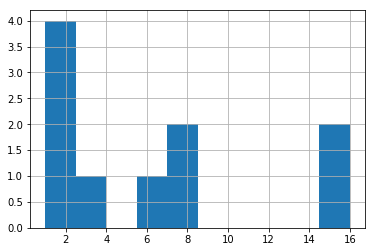

In [101]:
#Histogram of prices for w's tops
df['price'].value_counts().hist()

In [99]:
#The average on sale price for w's tops
df['price'].mean()

7.4915000000000012

### Convert the prices to numbers, if you haven't already

In [102]:
#converted up top

### What is the average discount between full price and on sale? Histogram too, please.

7.33183333333


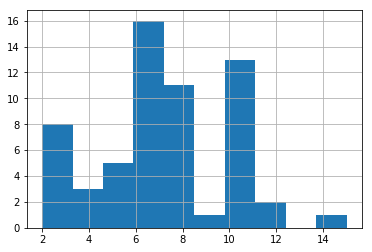

In [103]:
discount = df['old price'].astype(float) - df['price'].astype(float)
print(discount.mean())
discount.hist()

### What is the average discount as a percentage of the full price? Histogram too, please.

48.3254894959


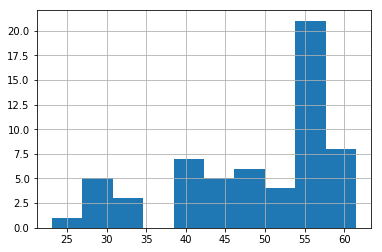

In [106]:
discount_percentage = discount / df['old price'].astype(float) * 100
print(discount_percentage.mean())
discount_percentage.hist()

## Shopping the sales

### How many items are over 50% off?


In [110]:
df['discount_percentage'] = discount_percentage
over_50 = df['discount_percentage'] >= 50
df[over_50].shape

(33, 6)

### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [111]:
df[over_50]

,old price,price,product code,product-title,product-url,discount_percentage
4,12.99,5.00,60133-E,Jersey Top,http://www.hm.com/us/product/60133?article=601...,61.508853
5,12.99,5.00,60133-F,Jersey Top,http://www.hm.com/us/product/60133?article=601...,61.508853
6,12.99,5.99,68934-C,Jersey Top,http://www.hm.com/us/product/68934?article=689...,53.887606
7,12.99,5.00,60133-B,Jersey Top,http://www.hm.com/us/product/60133?article=601...,61.508853
8,12.99,5.99,68934-A,Jersey Top,http://www.hm.com/us/product/68934?article=689...,53.887606
9,12.99,5.99,63019-A,T-shirt with Printed Design,http://www.hm.com/us/product/63019?article=630...,53.887606
10,17.99,7.00,65300-C,Crêped Camisole Top,http://www.hm.com/us/product/65300?article=653...,61.089494
11,12.99,5.99,63019-K,T-shirt with Printed Design,http://www.hm.com/us/product/63019?article=630...,53.887606
12,17.99,7.00,65300-A,Crêped Camisole Top,http://www.hm.com/us/product/65300?article=653...,61.089494
13,12.99,5.99,63019-Q,T-shirt with Printed Design,http://www.hm.com/us/product/63019?article=630...,53.887606
